# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from scipy import stats

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
csv_file_path = "/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/18 - Regressão Linear/Tarefa/ALUGUEL_MOD12.csv"

In [176]:
df = pd.read_csv(csv_file_path, delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.

In [177]:
# Tipos de Dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [178]:
# Verificação de dados nulos ou faltantes
(df.isnull().sum() / len(df)) * 100

,0
Valor_Aluguel,0.0
Valor_Condominio,0.0
Metragem,0.0
N_Quartos,0.0
N_banheiros,0.0
N_Suites,0.0
N_Vagas,0.0


- Não existem dados nulos ou faltantes.

In [179]:
# Alteração tipo de dados das variáveis Valor_Aluguel e Valor_Condominio de "int" para "float"
df["Valor_Aluguel"] = df["Valor_Aluguel"].astype(float)
df["Valor_Condominio"] = df["Valor_Condominio"].astype(float)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Valor_Aluguel     7203 non-null   float64
 1   Valor_Condominio  7203 non-null   float64
 2   Metragem          7203 non-null   int64  
 3   N_Quartos         7203 non-null   int64  
 4   N_banheiros       7203 non-null   int64  
 5   N_Suites          7203 non-null   int64  
 6   N_Vagas           7203 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 394.0 KB


In [181]:
# Renomear coluna N_banheiros
df.rename(columns={'N_banheiros': 'N_Banheiros'}, inplace=True)

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

In [182]:
# Describe
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


- Valor da **média** muito acima do valor da **mediana** nas variáveis **Valor_Aluguel** e **Valor_Condominio**.
- Valor **máximo** extremamente maior que o **percentil 75%** também nas variáveis **Valor_Aluguel** e **Valor_Condominio**.
- **Desvio padrão** muito elevado.

In [183]:
# Variável Valor_Condominio, N_Suites e N_Vagas zeradas na linha "min"
vl_cond = (df["Valor_Condominio"] == 0).sum()
vl_cond_perc = (df["Valor_Condominio"] == 0).mean() *100

vl_suites = (df["N_Suites"] == 0).sum()
vl_suites_perc = (df["N_Suites"] == 0).mean() *100

vl_vagas = (df["N_Vagas"] == 0).sum()
vl_vagas_perc = (df["N_Vagas"] == 0).mean() *100

print(f"Número de registros com Valor de Condomínio igual a zero: {vl_cond}")
print(f"Percentual de registros com Valor de Condomínio igual a zero: {vl_cond_perc:.2f}%")
print("--------------------------------------------------------------------")
print(f"Número de registros com Número de Suítes igual a zero: {vl_suites}")
print(f"Percentual de registros com Número de Suítes igual a zero: {vl_suites_perc:.2f}%")
print("--------------------------------------------------------------------")
print(f"Número de registros com Número de Vagas igual a zero: {vl_vagas}")
print(f"Percentual de registros com Número de Vagas igual a zero: {vl_vagas_perc:.2f}%")

Número de registros com Valor de Condomínio igual a zero: 638
Percentual de registros com Valor de Condomínio igual a zero: 8.86%
--------------------------------------------------------------------
Número de registros com Número de Suítes igual a zero: 1715
Percentual de registros com Número de Suítes igual a zero: 23.81%
--------------------------------------------------------------------
Número de registros com Número de Vagas igual a zero: 294
Percentual de registros com Número de Vagas igual a zero: 4.08%


- O valor do condomínio não é cobrado em casas que não fazem parte de um conjunto de dependências de uso comum. OK o mínimo estar zerado.
- Se tratam de casas/apartamento que não tenham suíte. OK o mínimo estar zerado.
- Se tratam de casas/apartamentos que não oferecem vagas de garagem. OK o mínimo estar zerado.

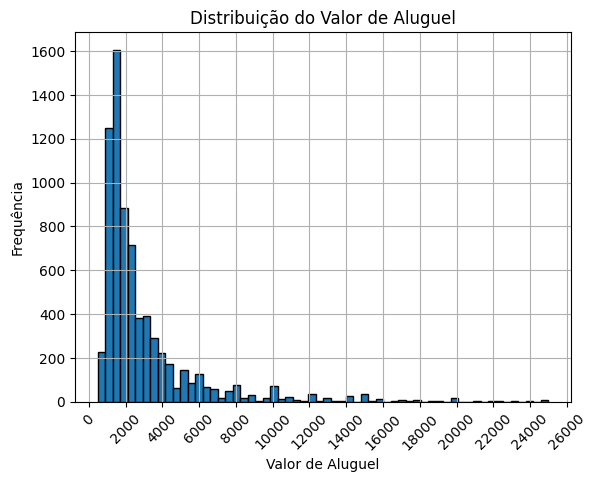

In [184]:
# Histograma Valor_Aluguel
df['Valor_Aluguel'].hist(bins=60, edgecolor='black')
plt.title('Distribuição do Valor de Aluguel')
plt.xlabel('Valor de Aluguel')
plt.xticks(ticks=range(0, int(df["Valor_Aluguel"].max())+3000, 2000), rotation=45)
plt.ylabel('Frequência')
plt.show()

- Pode-se observar maior número de ocorrências nas faixas entre **750** e **2400**, com destaque para valores na faixa de **1500**.

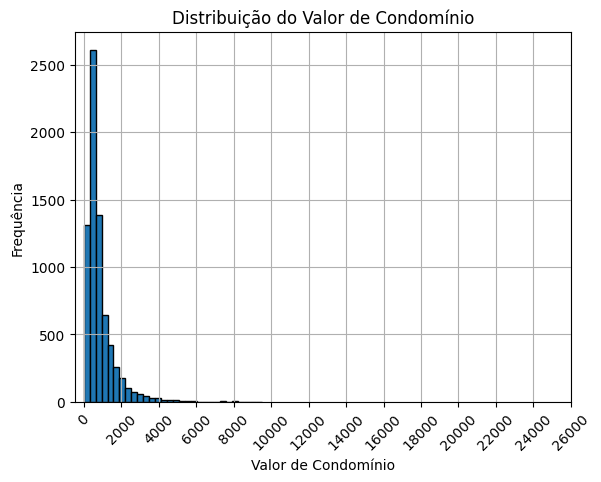

In [185]:
# Histograma Valor_Condominio
df['Valor_Condominio'].hist(bins=30, edgecolor='black')
plt.title('Distribuição do Valor de Condomínio')
plt.xlabel('Valor de Condomínio')
plt.xticks(ticks=range(0, int(df["Valor_Aluguel"].max())+2000, 2000), rotation=45)
plt.ylabel('Frequência')
plt.show()

- Pode-se observar maior número de ocorrências nas faixas entre **0** e **1000**, com destaque para valores na faixa de **500**.

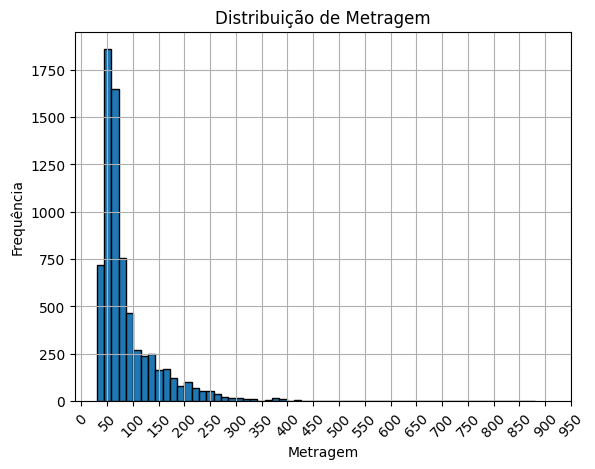

In [186]:
# Histograma Metragem
df['Metragem'].hist(bins=60, edgecolor='black')
plt.title('Distribuição de Metragem')
plt.xlabel('Metragem')
plt.xticks(ticks=range(0, int(df["Metragem"].max())+100, 50), rotation=45)
plt.ylabel('Frequência')
plt.show()

- Pode-se observar maior número de ocorrências nas faixas entre **40** e **80**, com destaque para metragens na faixa de **50**.

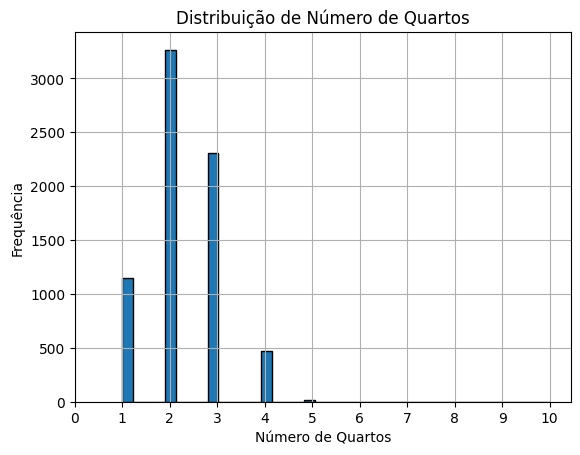

In [187]:
# Histograma N_Quartos
df['N_Quartos'].hist(bins=40, edgecolor='black')
plt.title('Distribuição de Número de Quartos')
plt.xlabel('Número de Quartos')
plt.xticks(ticks=range(0, int(df["N_Quartos"].max())+1, 1))
plt.ylabel('Frequência')
plt.show()

In [188]:
df['N_Quartos'].value_counts(normalize=True) * 100

,proportion
N_Quartos,
2,45.328335
3,31.986672
1,15.896154
4,6.566708
5,0.166597
6,0.027766
10,0.013883
7,0.013883


- Pode-se observar maior número de ocorrências para **2** quartos (**45,33%**). Imóveis com **3** quartos representa **31,96%** do total de ocorrências.

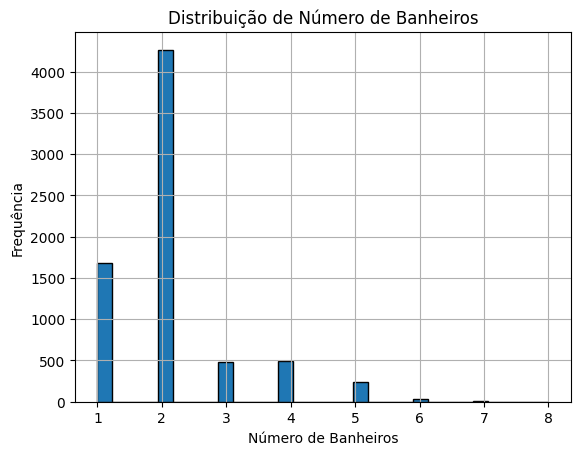

In [189]:
# Histograma N_Banheiros
df['N_Banheiros'].hist(bins=30, edgecolor='black')
plt.title('Distribuição de Número de Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel('Frequência')
plt.show()

In [190]:
df['N_Banheiros'].value_counts(normalize=True) * 100

,proportion
N_Banheiros,
2,59.225323
1,23.268083
4,6.830487
3,6.761072
5,3.318062
6,0.527558
7,0.041649
8,0.027766


- Pode-se observar maior número de ocorrências para **2** banheiros (**59,22%**).

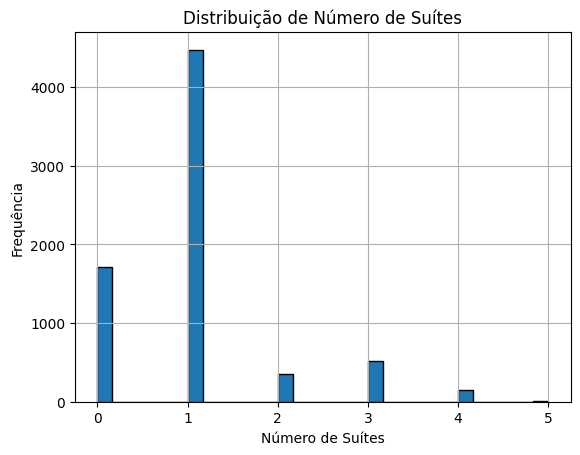

In [191]:
# Histograma N_Suites
df['N_Suites'].hist(bins=30, edgecolor='black')
plt.title('Distribuição de Número de Suítes')
plt.xlabel('Número de Suítes')
plt.ylabel('Frequência')
plt.show()

In [192]:
df['N_Suites'].value_counts(normalize=True) * 100

,proportion
N_Suites,
1,62.099125
0,23.809524
3,7.122032
2,4.859086
4,2.068583
5,0.041649


- Imóveis com **1** suíte representam **62,10%** das ocorrências.

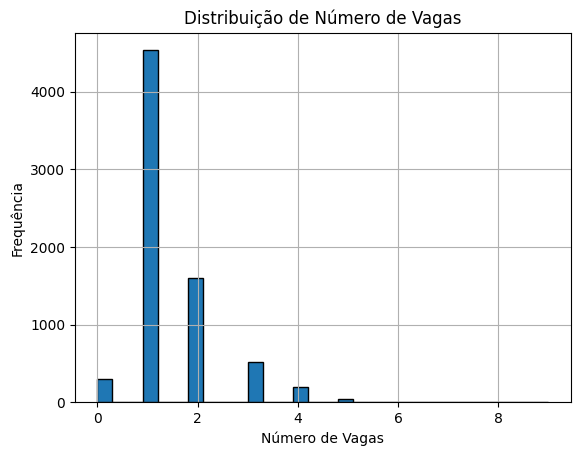

In [193]:
# Histograma N_Vagas
df['N_Vagas'].hist(bins=30, edgecolor='black')
plt.title('Distribuição de Número de Vagas')
plt.xlabel('Número de Vagas')
plt.ylabel('Frequência')
plt.show()

In [194]:
df['N_Vagas'].value_counts(normalize=True) * 100

,proportion
N_Vagas,
1,62.959878
2,22.240733
3,7.177565
0,4.081633
4,2.804387
5,0.555324
6,0.111065
8,0.027766
7,0.027766


- Imóveis com **1** vaga de garagem representam **62,96%** das ocorrências.

B) Caso note uma variável que te pareça conter outliers realize a análise e tratamento desses dados, justificando a escolha do método utilizado.

In [195]:
# Box Plot Valor_Aluguel
df_aluguel = df['Valor_Aluguel']
fig = px.box(df_aluguel, y='Valor_Aluguel', title='Box Plot de Valor do Aluguel', labels={'Valor_Aluguel': 'Valor do Aluguel'})
fig.show()

In [196]:
# Ocorrências onde Valor_Aluguel é maior que 5900 (limite superior)
df[df['Valor_Aluguel'] > 5900]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
6454,5990.0,1188.0,164,3,5,3,3
6455,5999.0,1400.0,175,4,4,1,2
6456,6000.0,800.0,150,3,4,3,2
6457,6000.0,0.0,152,2,2,1,1
6458,6000.0,1100.0,43,1,2,1,1
...,...,...,...,...,...,...,...
7198,25000.0,7500.0,627,4,5,4,6
7199,25000.0,4600.0,364,4,2,1,0
7200,25000.0,3700.0,266,3,4,3,7
7201,25000.0,6000.0,600,4,5,4,8


In [197]:
# Percentual de registros onde Valor_Aluguel é maior que 5900
perc_reg = (len(df[df['Valor_Aluguel'] > 5900]) / len(df) * 100)
print(f"Percentual de registros onde Valor_Aluguel é maior que 5900 é de: {perc_reg:.2f}%")

Percentual de registros onde Valor_Aluguel é maior que 5900 é de: 10.40%


In [198]:
# Método IQR
Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro dados sem outliers
df_alug_sem_outliers = df[(df['Valor_Aluguel'] >= limite_inferior) & (df['Valor_Aluguel'] <= limite_superior)]
print(df_alug_sem_outliers)

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_Banheiros  \
0             480.0             295.0        48          2            2   
1             500.0               0.0        50          1            2   
2             500.0               0.0        40          1            2   
3             500.0              36.0        45          1            2   
4             500.0               0.0        30          1            1   
...             ...               ...       ...        ...          ...   
6449         5900.0            1460.0        62          1            2   
6450         5900.0            1519.0       174          3            3   
6451         5900.0            1250.0       148          3            4   
6452         5900.0             650.0       146          3            2   
6453         5900.0            1380.0       186          3            4   

      N_Suites  N_Vagas  
0            1        1  
1            1        1  
2            1       

In [199]:
# Filtro dados apenas outliers
outliers = df[(df['Valor_Aluguel'] < limite_inferior) | (df['Valor_Aluguel'] > limite_superior)]
print(outliers)

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_Banheiros  \
6454         5990.0            1188.0       164          3            5   
6455         5999.0            1400.0       175          4            4   
6456         6000.0             800.0       150          3            4   
6457         6000.0               0.0       152          2            2   
6458         6000.0            1100.0        43          1            2   
...             ...               ...       ...        ...          ...   
7198        25000.0            7500.0       627          4            5   
7199        25000.0            4600.0       364          4            2   
7200        25000.0            3700.0       266          3            4   
7201        25000.0            6000.0       600          4            5   
7202        25000.0            1587.0       248          4            3   

      N_Suites  N_Vagas  
6454         3        3  
6455         1        2  
6456         3       

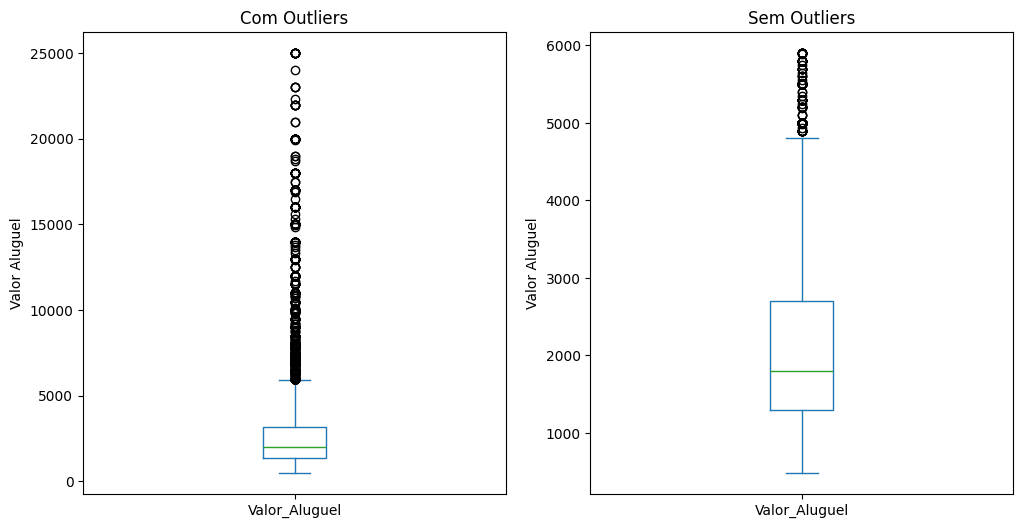

In [200]:
# Box Plot Valor_Aluguel antes e depois
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Valor_Aluguel'].plot(kind='box', title='Com Outliers')
plt.ylabel('Valor Aluguel')

plt.subplot(1, 2, 2)
df_alug_sem_outliers['Valor_Aluguel'].plot(kind='box', title='Sem Outliers')
plt.ylabel('Valor Aluguel')

plt.show()

In [201]:
# Outliers Valor_Condominio
df_condominio = df['Valor_Condominio']
fig = px.box(df_condominio, y='Valor_Condominio', title='Box Plot de Valor do Condomínio', labels={'Valor_Condominio': 'Valor do Condomínio'})
fig.show()

In [202]:
# Ocorrências onde Valor_Condominio é maior que 1854 (limite superior)
df[df['Valor_Condominio'] > 1854]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
1649,1300.0,2435.0,208,4,3,2,3
2083,1400.0,1966.0,30,1,1,0,1
2156,1500.0,2893.0,230,3,2,1,2
2492,1500.0,2893.0,230,3,2,1,2
2753,1600.0,1900.0,30,1,1,0,1
...,...,...,...,...,...,...,...
7197,25000.0,5636.0,327,4,3,2,3
7198,25000.0,7500.0,627,4,5,4,6
7199,25000.0,4600.0,364,4,2,1,0
7200,25000.0,3700.0,266,3,4,3,7


In [203]:
# Percentual de registros onde Valor_Condominio é maior que 1854
perc_reg = (len(df[df['Valor_Condominio'] > 1854]) / len(df) * 100)
print(f"Percentual de registros onde Valor_Condominio é maior que 1854 é de: {perc_reg:.2f}%")

Percentual de registros onde Valor_Condominio é maior que 1854 é de: 8.14%


In [204]:
# Método IQR
Q1 = df['Valor_Condominio'].quantile(0.25)
Q3 = df['Valor_Condominio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro dados sem outliers
df_cond_sem_outliers = df[(df['Valor_Condominio'] >= limite_inferior) & (df['Valor_Condominio'] <= limite_superior)]
print(df_cond_sem_outliers)

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_Banheiros  \
0             480.0             295.0        48          2            2   
1             500.0               0.0        50          1            2   
2             500.0               0.0        40          1            2   
3             500.0              36.0        45          1            2   
4             500.0               0.0        30          1            1   
...             ...               ...       ...        ...          ...   
7173        20000.0               0.0       469          4            5   
7182        21000.0               0.0       223          3            2   
7189        22300.0            1800.0       209          4            5   
7195        25000.0            1600.0       209          3            4   
7202        25000.0            1587.0       248          4            3   

      N_Suites  N_Vagas  
0            1        1  
1            1        1  
2            1       

In [205]:
# Filtro dados apenas outliers
outliers_cond = df[(df['Valor_Condominio'] < limite_inferior) | (df['Valor_Condominio'] > limite_superior)]
print(outliers_cond)

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_Banheiros  \
1649         1300.0            2435.0       208          4            3   
2083         1400.0            1966.0        30          1            1   
2156         1500.0            2893.0       230          3            2   
2492         1500.0            2893.0       230          3            2   
2753         1600.0            1900.0        30          1            1   
...             ...               ...       ...        ...          ...   
7197        25000.0            5636.0       327          4            3   
7198        25000.0            7500.0       627          4            5   
7199        25000.0            4600.0       364          4            2   
7200        25000.0            3700.0       266          3            4   
7201        25000.0            6000.0       600          4            5   

      N_Suites  N_Vagas  
1649         2        3  
2083         0        1  
2156         1       

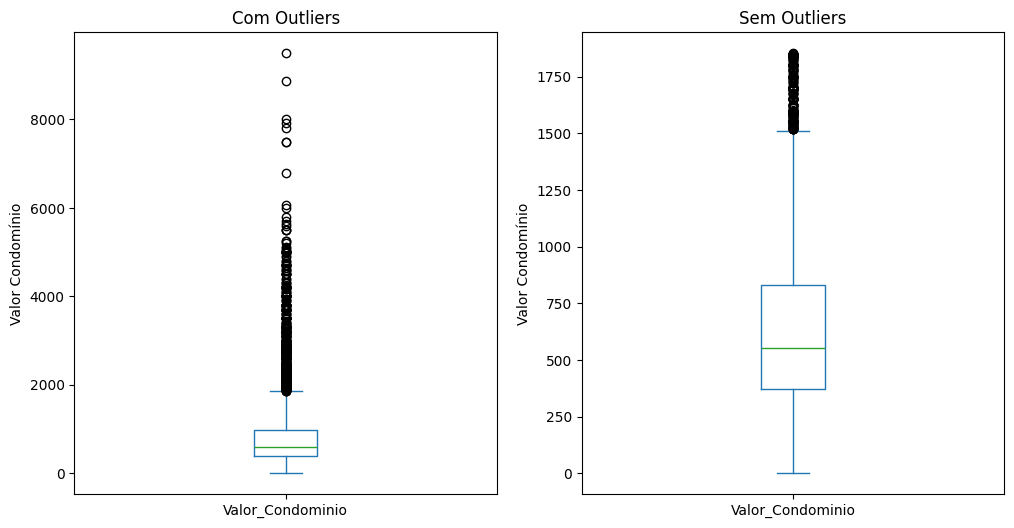

In [206]:
# Box Plot Valor_Condominio antes e depois
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Valor_Condominio'].plot(kind='box', title='Com Outliers')
plt.ylabel('Valor Condomínio')

plt.subplot(1, 2, 2)
df_cond_sem_outliers['Valor_Condominio'].plot(kind='box', title='Sem Outliers')
plt.ylabel('Valor Condomínio')

plt.show()

In [207]:
# Box Plot Metragem
df_aluguel = df['Metragem']
fig = px.box(df_aluguel, y='Metragem', title='Box Plot de Metragem', labels={'Metragem': 'Metragem'})
fig.show()

In [208]:
# Ocorrências onde Metragem é maior que 172 (limite superior)
df[df['Metragem'] > 172]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
1649,1300.0,2435.0,208,4,3,2,3
2156,1500.0,2893.0,230,3,2,1,2
2492,1500.0,2893.0,230,3,2,1,2
2989,1700.0,0.0,250,3,2,1,0
3525,1900.0,2200.0,225,4,2,1,3
...,...,...,...,...,...,...,...
7198,25000.0,7500.0,627,4,5,4,6
7199,25000.0,4600.0,364,4,2,1,0
7200,25000.0,3700.0,266,3,4,3,7
7201,25000.0,6000.0,600,4,5,4,8


In [209]:
# Percentual de registros onde Metragem é maior que 172
perc_reg = (len(df[df['Metragem'] > 172]) / len(df) * 100)
print(f"Percentual de registros onde Metragem é maior que 172 é de: {perc_reg:.2f}%")

Percentual de registros onde Metragem é maior que 172 é de: 8.98%


In [210]:
# Método IQR
Q1 = df['Metragem'].quantile(0.25)
Q3 = df['Metragem'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro dados sem outliers
df_m2_sem_outliers = df[(df['Metragem'] >= limite_inferior) & (df['Metragem'] <= limite_superior)]
print(df_m2_sem_outliers)

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_Banheiros  \
0             480.0             295.0        48          2            2   
1             500.0               0.0        50          1            2   
2             500.0               0.0        40          1            2   
3             500.0              36.0        45          1            2   
4             500.0               0.0        30          1            1   
...             ...               ...       ...        ...          ...   
7116        15000.0            2000.0       101          1            2   
7125        15338.0            1850.0       158          3            4   
7126        15600.0            2300.0       162          3            4   
7136        16000.0            1300.0       168          2            3   
7168        20000.0            2300.0       131          2            3   

      N_Suites  N_Vagas  
0            1        1  
1            1        1  
2            1       

In [211]:
# Filtro dados apenas outliers
outliers_m2 = df[(df['Metragem'] < limite_inferior) | (df['Metragem'] > limite_superior)]
print(outliers_m2)

      Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_Banheiros  \
1649         1300.0            2435.0       208          4            3   
2156         1500.0            2893.0       230          3            2   
2492         1500.0            2893.0       230          3            2   
2989         1700.0               0.0       250          3            2   
3525         1900.0            2200.0       225          4            2   
...             ...               ...       ...        ...          ...   
7198        25000.0            7500.0       627          4            5   
7199        25000.0            4600.0       364          4            2   
7200        25000.0            3700.0       266          3            4   
7201        25000.0            6000.0       600          4            5   
7202        25000.0            1587.0       248          4            3   

      N_Suites  N_Vagas  
1649         2        3  
2156         1        2  
2492         1       

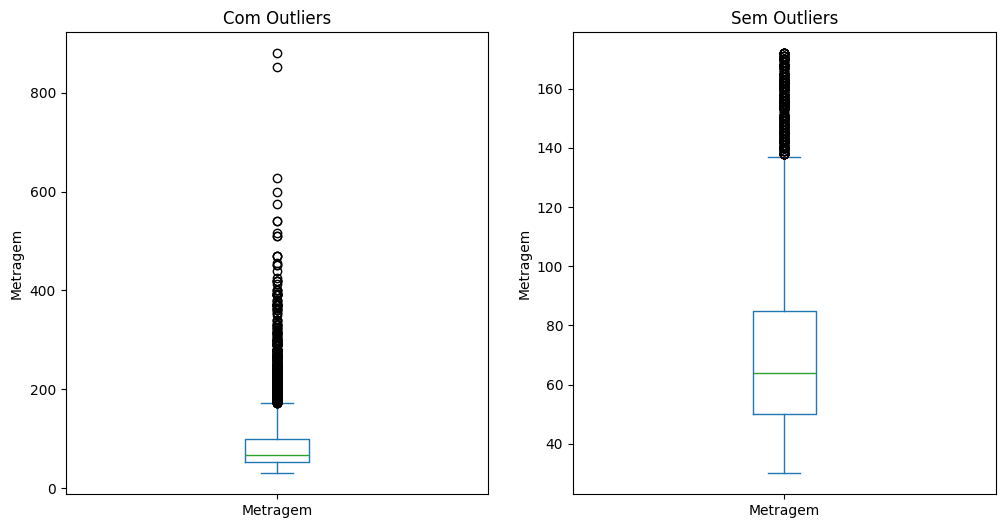

In [212]:
# Box Plot Metragem antes e depois
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Metragem'].plot(kind='box', title='Com Outliers')
plt.ylabel('Metragem')

plt.subplot(1, 2, 2)
df_m2_sem_outliers['Metragem'].plot(kind='box', title='Sem Outliers')
plt.ylabel('Metragem')

plt.show()

- Optei por **manter os outliers** na base de dados para as colunas **Valor_Aluguel**, **Valor_Condominio** e **Metragem**, pois eles parecem refletir casos reais, e não erros ou inconsistências nos registros. A variação nesses valores pode ser atribuída a fatores como localização, padrão dos imóveis, estrutura e serviços oferecidos, principalmente em grandes centros ou regiões que comportam uma ampla gama de classes sociais. Remover ou ajustar os outliers poderia ocultar informações relevantes sobre o mercado imobiliário. Além disso, valores extremos representam uma fatia real do mercado de imóveis, assim como aqueles imóveis mais acessíveis que representam a maioria dos registros.
- Os outliers se fizeram presentes nas plotagens mesmo ajustando o fator de IQR para uma maior flexibilização dos dados.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [213]:
df.head()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
0,480.0,295.0,48,2,2,1,1
1,500.0,0.0,50,1,2,1,1
2,500.0,0.0,40,1,2,1,1
3,500.0,36.0,45,1,2,1,0
4,500.0,0.0,30,1,1,0,0


- Imóveis com quantas suítes tendem a ter o valor de aluguel mais elevado?
- Qual a relação entre o valor de condomínio e número de vagas de garagem?
- O número de vagas de garagem influencia no valor de aluguel?
- Qual a relação entre metragem e número de quartos?

In [214]:
# Imóveis com quantas suítes tendem a ter o valor de aluguel mais elevado?
df_grouped = df.groupby(['N_Suites', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_suites = df_grouped.groupby('N_Suites')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_suites) * 100

fig = px.bar(df_grouped, x='N_Suites', y='percent', color='Valor_Aluguel', barmode='stack',
             labels={'N_Suites': 'Número de Suítes', 'percent': 'Porcentagem', 'Valor_Aluguel': 'Valor Aluguel'})

fig.update_layout(title='Relação entre Valor de Aluguel e Número de Suítes',
                  yaxis_title='Porcentagem')
fig.show()

- Imóveis **sem suíte** (0 suítes) têm valores que variam entre **650 e 8000**, com destaque para imóveis com aluguel de **1200**, que representam **8,22%** do total de imóveis da mesma categoria (**141 registros**).
- Imóveis com **1 suíte** têm valores que variam entre **628 e 14000**, com destaque para imóveis com aluguel de **1500**, que representam **5,28%** do total de imóveis da mesma categoria (**236 registros**).
- Imóveis com **2 suítes** têm valores que variam entre **1050 e 25000**, com destaque para imóveis com aluguel de **6000**, que representam **5,43%** do total de imóveis da mesma categoria (**19 registros**).
- Imóveis com **3 suítes** têm valores que variam entre **1500 e 25000**, com destaque para imóveis com aluguel de **4000**, que representam **5,85%** do total de imóveis da mesma categoria (**30 registros**).
- Imóveis com **4 suítes** têm valores que variam entre **2000 e 25000**, com destaque para imóveis com aluguel de **15000**, que representam **9,40%** do total de imóveis da mesma categoria (**14 registros**).
- Imóveis com **5 suítes** são encontrados em apenas **3 registros** e têm valores de **8700, 16000 e 19900**.

In [215]:
# Qual a relação entre o valor de condomínio e número de vagas de garagem?
df_grouped = df.groupby(['N_Vagas', 'Valor_Condominio']).size().reset_index(name='count')
total_por_vagas = df_grouped.groupby('N_Vagas')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_vagas) * 100

fig = px.bar(df_grouped, x='N_Vagas', y='percent', color='Valor_Condominio', barmode='stack',
             labels={'N_Vagas': 'Número de Vagas de Garagem', 'percent': 'Porcentagem', 'Valor_Condominio': 'Valor Condomínio'})

fig.update_layout(title='Relação entre Valor de Condomínio e Número de Vagas de Garagem',
                  yaxis_title='Porcentagem')
fig.show()

- Por padrão, pode-se dizer que imóveis com mais vagas de garagem têm o valor de condomínio mais elevado, como é apresentado, por exemplo, na plotagem para imóveis com **6 vagas** e que representam **0,11%** do total dos registros (**8 registros**), e variam entre **4400 e 8000**. Mas existem exceções.
- Já **85,2%** do total dos registros apresenta imóveis com **1 e 2 vagas** de garagem, com valores de condomínio podendo chegar no máximo a **2700 (2 registros)** e **4180 (1 registro)**, respectivamente.
- Um registro de imóvel da categoria **4 vagas** de garagem apresenta valor de condomínio de **9500**.
- Imóveis com **5 vagas** de garagem **(40 registros)** têm valores de condomínio que podem variar entre **0 e 7928**, apresentando faixas de valores bem equilibradas.

In [216]:
# O número de vagas de garagem influencia no valor de aluguel?
df_grouped = df.groupby(['N_Vagas', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_vagas = df_grouped.groupby('N_Vagas')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_vagas) * 100

fig = px.bar(df_grouped, x='N_Vagas', y='percent', color='Valor_Aluguel', barmode='stack',
             labels={'N_Vagas': 'Número de Vagas de Garagem', 'percent': 'Porcentagem', 'Valor_Aluguel': 'Valor Aluguel'})

fig.update_layout(title='Relação entre Valor de Aluguel e Número de Vagas de Garagem',
                  yaxis_title='Porcentagem')
fig.show()

- Apesar de haver ocorrências de valores de aluguel altos para imóveis em qualquer categoria de vagas de garagem (de 0 a 9 vagas), os altos valores são mais predominantes em imóveis com maior número de vagas, como a partir de 4 vagas, mesmo que se tratem de poucos registros, pode-se afirmar que o número de vagas influencia no valor do aluguel.

In [217]:
# Qual a relação entre metragem e número de quartos?
df_grouped = df.groupby(['N_Quartos', 'Metragem']).size().reset_index(name='count')
total_por_quartos = df_grouped.groupby('N_Quartos')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_quartos) * 100

fig = px.bar(df_grouped, x='N_Quartos', y='percent', color='Metragem', barmode='stack',
             labels={'N_Quartos': 'Número de Quartos', 'percent': 'Porcentagem', 'Metragem': 'Metragem'})

fig.update_layout(title='Relação entre Metragem e Número de Quartos',
                  yaxis_title='Porcentagem')
fig.show()

- **93,22%** dos registros estão nas categorias 1, 2 e 3 quartos e apresentam metragens que variam de **30 a 145**, **36 a 256** e **47 a 360**, respectivamente.
- Imóveis a partir de 4 quartos começam a apresentar maior metragem, podendo ser visto com clareza na representação dos imóveis com 5, 6 e principalmente 7 quartos.
- Não existem registros com **8 e 9 quartos**.
- O imóvel com 10 quartos acaba sendo uma exceção, pois tem apenas **273**.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [218]:
# Matriz de Correlação
df.corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_Banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


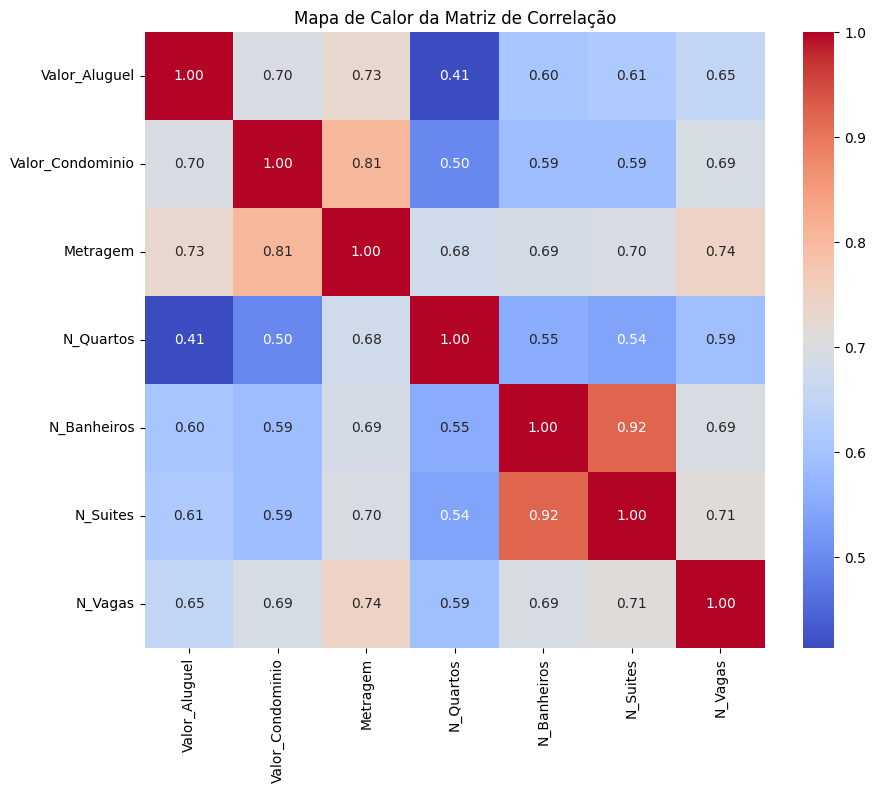

In [219]:
# Mapa de Calor da Matriz de Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

- Valor_Aluguel x Valor_Condominio - **0.695302**: quanto mais elevado o valor do aluguel, mais elevado também o valor do condomínio.
- Valor_Aluguel x Metragem - **0.730591**: imóveis com maior metragem têm valor de aluguel mais elevado.
- Valor_Condominio x Metragem - **0.805926**: imóveis maiores tendem a ter custos mais elevados.
- Valor_Condominio x N_Vagas - **0.690993**: vagas de garagem exigem manutenção/limpeza e por isso elevam o custo do condomínio.
- Metragem x N_Quartos - **0.678091**: quanto maior o número de quartos, maior a metragem do imóvel.
- Metragem x N_Banheiros - **0.687558**: quanto maior o número de banheiros, maior a metragem do imóvel.
- Metragem x N_Suites - **0.696281**: quanto maior o número de suítes, maior a metragem do imóvel.
- Metragem x N_Vagas - **0.743872**: quanto maior o número de vagas, maior a metragem do imóvel.
- N_Suites x N_Banheiros - **0.920149**: relação muito forte, pois quanto maior o número de suítes, maior o número de banheiros, pois uma suíte compreende um quarto e um banheiro.
- N_Suites x N_Vagas - **0.712054**: imóveis com mais suítes tendem a ser de padrão mais elevado, e apresentam mais vagas de garagem para acomodar mais moradores ou visitantes que possuam carro.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [220]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [221]:
# Conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [222]:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
6931,1350.0,176,3,4,3,3
4125,680.0,70,1,1,0,2
6079,650.0,66,2,1,0,1
5044,655.0,68,3,2,1,1
2299,330.0,33,1,1,0,1
...,...,...,...,...,...,...
3772,450.0,48,2,2,1,1
5191,570.0,34,1,1,0,1
5226,976.0,95,2,2,1,1
5390,550.0,74,3,3,1,2


In [223]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
3885,484.0,50,2,1,0,1
4661,680.0,50,2,1,0,1
1038,0.0,58,2,2,1,1
5867,1226.0,127,3,1,0,2
5099,697.0,90,4,3,1,2
...,...,...,...,...,...,...
4689,1250.0,160,3,3,1,2
5313,530.0,43,1,2,1,1
5624,1250.0,147,4,4,2,3
4647,650.0,53,2,1,0,1


In [224]:
y_train

,Valor_Aluguel
6931,10000.0
4125,2200.0
6079,4500.0
5044,2900.0
2299,1500.0
...,...
3772,2000.0
5191,3000.0
5226,3000.0
5390,3200.0


In [225]:
y_test

,Valor_Aluguel
3885,2100.0
4661,2500.0
1038,1200.0
5867,4000.0
5099,3000.0
...,...
4689,2550.0
5313,3100.0
5624,3500.0
4647,2500.0


In [226]:
print("Tamanho X_train: ", X_train.shape)

Tamanho X_train:  (5402, 6)


In [227]:
print("Tamanho X_test: ", X_test.shape)

Tamanho X_test:  (1801, 6)


In [228]:
print("Tamanho y_train: ", y_train.shape)

Tamanho y_train:  (5402,)


In [229]:
print("Tamanho y_test: ", y_test.shape)

Tamanho y_test:  (1801,)


# 4 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linear simples e para isso usaremos apenas uma váriavel, a váriavel Metragem.

In [230]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [231]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
regressao_simples = LinearRegression()
regressao_simples.fit(X - 30, y) # X - 30, porque não existem imóveis com metragem zero, e sim a partir de 30m²

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [232]:
# Intercept
regressao_simples.intercept_

938.0674219981945

In [233]:
# Coef
regressao_simples.coef_

array([34.70818769])

- Equação Reta seria: **Valor_Aluguel = 938.07 + 34.71 * (Metragem - 30)**

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [234]:
# R quadrado
regressao_simples.score(X, y)

0.3909286271422774

- Um  R quadrado de 0.3909 indica que aproximadamente 39.1% da variação na variável dependente Valor_Aluguel é explicada pela variável independente Metragem no modelo de regressão. Isso significa que o modelo de regressão tem uma explicação fraca/moderada para a variabilidade nos dados. Sendo assim, é possível entender que o resultado poderia ser melhor e que outros fatores além da Metragem são responsáveis pelo maior valor dos aluguéis.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

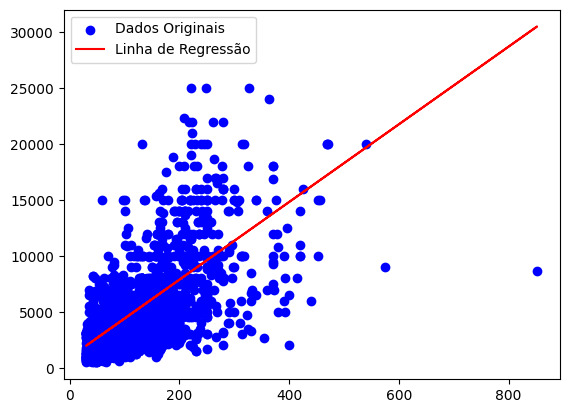

In [235]:
# Dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Linha de regressão
plt.plot(X, regressao_simples.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

- Embora exista uma grande concentração de pontos no quadrante inferior esquerdo, não é possível afirmar quais destes pontos realmente cruza a reta. O gráfico nos mostra a maior parte dos pontos distribuídos fora da linha, o que indica que a grande maioria da variação não é explicada pelo modelo. Ainda assim, é possível verificar em alguns poucos pontos que cruzam a reta que imóveis de maior metragem influem no valor do aluguel.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [236]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [237]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_simples.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_simples.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.45308457941630287


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

- R quadrado treino: 0.3909286271422774
- R quadrado teste: 0.45308457941630287
- O conjunto de treino mostra que o modelo consegue capturar uma boa parte da variação nos dados de treinamento, mas que pode ainda ser melhorado. Já o conjunto de teste apresentou um resultado melhor ao ser avaliado com dados novos, possivelmente porque esses dados têm um padrão mais claro ou mais fácil de ser capturado pelo modelo. A diferença de 6% pode ser considerada aceitável, e indica que o modelo não está apresentando overfitting e que está aprendendo os padrões e é capaz de prever novos dados.

# 5 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 4 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [246]:
# Separação das variáveis independetes da variável dependente
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

In [239]:
# Conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [240]:
# Confirmando os tamanhos das bases de treino e teste
print("Tamanho X_train: ", X_train.shape)
print("Tamanho X_test: ", X_test.shape)
print("Tamanho y_train: ", y_train.shape)
print("Tamanho y_test: ", y_test.shape)

Tamanho X_train:  (5402, 6)
Tamanho X_test:  (1801, 6)
Tamanho y_train:  (5402,)
Tamanho y_test:  (1801,)


- Executei novamente a criação das bases de treino e teste, pois após a questão referente a regressão linear simples não consegui ajustar para que fossem carregadas as demais colunas para X, apenas a coluna Metragem. Sendo assim, optei por rodar novamente.

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [241]:
# Modelo usando LinearRegression e as bases de treino.
regressao_multipla = LinearRegression()
regressao_multipla.fit(X, y)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [242]:
# R Quadrado
regressao_multipla.score(X, y)

0.6076098775929859

- Esse valor de R quadrado indica que 60.76% da variação nos valores da variável dependente (Valor_Aluguel) pode ser explicada pelas variáveis independentes. Podemos considerar que o resultado do modelo é razoavelmente bom.

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [251]:
# Modelo usando LinearRegression e as bases de teste.
X_test = X_test
y_test = y_test

In [252]:
# R Quadrado
regressao_multipla.score(X_test, y_test)

0.6350572928561846

- R quadrado treino: 0.6076098775929859
- R quadrado teste: 0.6350572928561846
- O conjunto de teste apresenta um resultado aproximadamente 3% superior ao conjunto de treino, o que sugere que o modelo não está sofrendo overfitting, o que é bom. O modelo está generalizando (aprendendo e prevendo) de forma razoavelmente boa para dados novos.

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

- A regressão linear múltipla apresenta um desempenho superior aos resultados da regressão linear simples, principalmente por considerar múltiplas variáveis independentes, pois dessa forma o modelo é capaz de captar uma gama maior de informações e fatores que influenciam a variável dependente. Sendo assim, considero que a regressão linear múltipla, neste caso, é melhor.
- Mesmo a regressão linear simples tendo sido rodada considerando as variáveis independente e dependete de maior correlação, não foi o suficiente para retornar uma boa explicação da variação.
- Embora a regressão múltipla tenha apresentado resultados melhores e seja a melhor opção para este caso, é certo afirmar que ainda faltam alguns dados (que não constam na base de dados) que poderiam alterar o R quadrado de um score bom para ótimo, como por exemplo, a localização do imóvel, a idade do imóvel, o estado de conservação, etc.

